# LDA 토픽모델링
```LDA(Latent Dirichlet Allocation, 잠재 디리클레 할당)```는 주어진 문서 집합에서 어떤 주제(Topic)들이 있는지 자동으로 찾아내는 대표적인 토픽 모델링 알고리즘입니다. '이 문서들은 어떤 주제들에 대해 이야기하고 있을까?'라는 질문에 대한 답을 통계적인 방법으로 찾아주는 것이죠. 예를 들어, "사과, 배, 맛있다"라는 문서와 "아이폰, 앱, 비싸다"라는 문서가 있다면, LDA는 '과일'과 'IT 기기'라는 두 가지 주제를 발견하고, 각 문서가 어떤 주제에 더 가까운지를 확률적으로 나타내 줍니다.

In [1]:
from konlpy.tag import Okt
from gensim.corpora import Dictionary
from gensim.models import LdaModel

documents = [
    "국토교통부는 부동산 투기 근절을 위해 강력한 세금 정책을 예고했습니다. 다주택자에 대한 규제가 핵심입니다.",
    "정부의 새로운 공급 대책 발표 이후, 부동산 시장의 반응은 엇갈리고 있습니다. 전문가들은 정책의 실효성에 주목합니다.",
    "치솟는 집값 안정을 위해 정부는 대출 총량 규제를 더욱 강화할 방침입니다. 서민들의 내 집 마련이 어려워지고 있습니다.",
    "이번 부동산 정책은 신혼부부와 청년층을 위한 특별 공급 물량 확대에 초점을 맞추고 있습니다.",
    "부동산 시장의 과열을 막기 위해 금리 인상과 같은 금융 정책이 함께 동원되어야 한다는 목소리가 높습니다.",
    "최근 반려동물을 가족처럼 여기는 사람들이 늘어나면서 펫팸족이라는 신조어가 생겼습니다. 동물에 대한 사랑이 깊어지고 있습니다.",
    "유기견 보호소에서는 매일 새로운 강아지들이 구조되고 있습니다. 많은 유기견들이 새로운 가족을 기다리며 입양을 희망합니다.",
    "강아지 입양 전에는 신중한 고민이 필요합니다. 한 생명을 책임지는 일이기에 사랑과 헌신이 중요합니다.",
    "동물보호단체는 유기동물 안락사를 줄이기 위해 사회적인 관심과 적극적인 입양 캠페인이 필요하다고 강조했습니다.",
    "길고양이들을 위한 겨울나기 쉼터가 마련되었습니다. 시민들의 따뜻한 사랑 덕분에 동물들이 추운 겨울을 보낼 수 있게 됐습니다."
]

In [2]:
okt = Okt()
tokenized_docs = [okt.nouns(i) for i in documents]

In [3]:
# 단어 사전(Dictionary) 생성
# 각 단어에 고유한 ID를 부여합니다.
dictionary = Dictionary(tokenized_docs)
list(dictionary.items())

[(0, '국토교통부'),
 (1, '규제'),
 (2, '근절'),
 (3, '대한'),
 (4, '부동산'),
 (5, '세금'),
 (6, '예고'),
 (7, '위해'),
 (8, '정책'),
 (9, '주택'),
 (10, '투기'),
 (11, '핵심'),
 (12, '공급'),
 (13, '대책'),
 (14, '반응'),
 (15, '발표'),
 (16, '시장'),
 (17, '실효'),
 (18, '이후'),
 (19, '전문가'),
 (20, '정부'),
 (21, '주목'),
 (22, '내'),
 (23, '대출'),
 (24, '더욱'),
 (25, '마련'),
 (26, '방침'),
 (27, '서민'),
 (28, '안정'),
 (29, '집'),
 (30, '집값'),
 (31, '총량'),
 (32, '물량'),
 (33, '신혼부부'),
 (34, '위'),
 (35, '이번'),
 (36, '청년'),
 (37, '초점'),
 (38, '층'),
 (39, '특별'),
 (40, '확대'),
 (41, '과열'),
 (42, '금리'),
 (43, '금융'),
 (44, '동원'),
 (45, '목소리'),
 (46, '인상'),
 (47, '가족'),
 (48, '동물'),
 (49, '반려동물'),
 (50, '사람'),
 (51, '사랑'),
 (52, '신조어'),
 (53, '최근'),
 (54, '펫팸족'),
 (55, '강아지'),
 (56, '구조'),
 (57, '매일'),
 (58, '보호'),
 (59, '소'),
 (60, '유기견'),
 (61, '입양'),
 (62, '희망'),
 (63, '고민'),
 (64, '생명'),
 (65, '이기'),
 (66, '전'),
 (67, '헌신'),
 (68, '강조'),
 (69, '관심'),
 (70, '단체'),
 (71, '동물보호'),
 (72, '사회'),
 (73, '안락사'),
 (74, '유기동물'),
 (75, '적극'),
 (76, '캠페

In [4]:
# 코퍼스(Corpus) 생성
# 각 문서를 (단어 ID, 단어 빈도수) 형태의 벡터로 변환합니다.
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1)],
 [(4, 1),
  (8, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1)],
 [(1, 1),
  (7, 1),
  (20, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1)],
 [(4, 1),
  (8, 1),
  (12, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1)],
 [(4, 1),
  (7, 1),
  (8, 1),
  (16, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1)],
 [(3, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1)],
 [(47, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 2),
  (61, 1),
  (62, 1)],
 [(51, 1), (55, 1), (61, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1)],
 [(7, 1),
  (61, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (7

In [5]:
from gensim.models import LdaModel, CoherenceModel

coherence_values = []
k_range = range(2, 11)  # 2개부터 10개까지의 토픽 수를 테스트

for num_topics in k_range:
    # LDA 모델 훈련
    model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=num_topics,
                     passes=100)
    
    # Coherence 모델 생성 및 점수 계산
    # coherence='c_v'는 가장 널리 쓰이는 일관성 측정 방법 중 하나입니다.
    coherencemodel = CoherenceModel(model=model, texts=tokenized_docs, dictionary=dictionary)
    coherence_values.append(coherencemodel.get_coherence())
    print(f"토픽 수 = {num_topics}, Coherence Score = {coherencemodel.get_coherence():.4f}")

토픽 수 = 2, Coherence Score = 0.3755
토픽 수 = 3, Coherence Score = 0.2679
토픽 수 = 4, Coherence Score = 0.3298
토픽 수 = 5, Coherence Score = 0.2482
토픽 수 = 6, Coherence Score = 0.2886
토픽 수 = 7, Coherence Score = 0.3383
토픽 수 = 8, Coherence Score = 0.3619
토픽 수 = 9, Coherence Score = 0.3439
토픽 수 = 10, Coherence Score = 0.2968


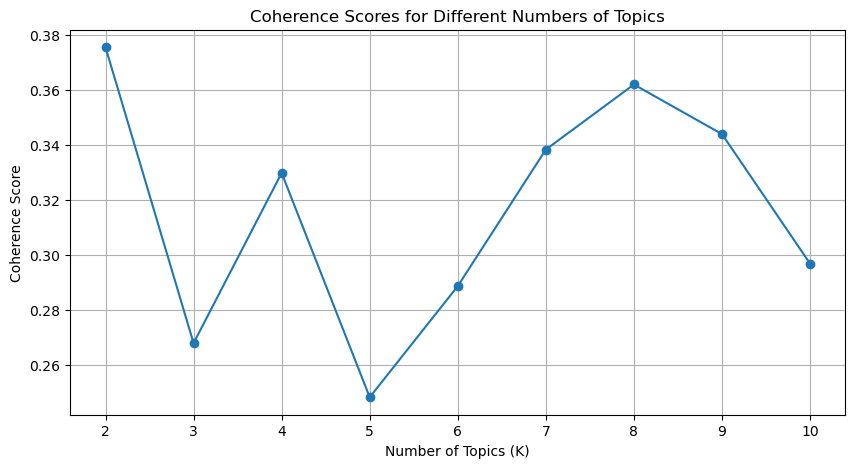

In [6]:
import matplotlib.pyplot as plt

# 그래프로 표현
plt.figure(figsize=(10, 5))
plt.plot(k_range, coherence_values, marker='o')
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Numbers of Topics")
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [7]:
# LDA 모델 훈련
# 주제의 개수(num_topics)와 사전(id2word)을 지정합니다.
# passes는 모델 훈련 반복 횟수입니다.


In [8]:
num_topics = 2  # 예시로 2개의 주제를 추출하도록 설정
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# 결과 확인
topics = lda_model.print_topics(num_words=5) # 각 주제별로 연관성이 높은 단어 5개씩 출력
print("추출된 주제:")
for topic in topics:
    print(topic)

추출된 주제:
(0, '0.038*"입양" + 0.027*"사랑" + 0.027*"유기견" + 0.027*"강아지" + 0.027*"가족"')
(1, '0.035*"정책" + 0.035*"부동산" + 0.035*"위해" + 0.025*"정부" + 0.025*"규제"')


In [9]:
import numpy as np

def make_topic(x):
    box = []
    for i in x:
        box.append(i[1])
    return np.argmax(box)

box = []
# 새로운 문서에 대한 주제 추론
for i, doc_bow in enumerate(corpus):
    doc_topics = lda_model.get_document_topics(doc_bow)
    print(f"문서 {i+1}의 주제 분포:", doc_topics)
    box.append(make_topic(doc_topics))

문서 1의 주제 분포: [(0, 0.04210965), (1, 0.9578904)]
문서 2의 주제 분포: [(0, 0.04171676), (1, 0.95828325)]
문서 3의 주제 분포: [(0, 0.03738517), (1, 0.9626149)]
문서 4의 주제 분포: [(0, 0.94556814), (1, 0.054431874)]
문서 5의 주제 분포: [(0, 0.048517097), (1, 0.9514829)]
문서 6의 주제 분포: [(0, 0.9438674), (1, 0.05613267)]
문서 7의 주제 분포: [(0, 0.9532734), (1, 0.0467266)]
문서 8의 주제 분포: [(0, 0.94183135), (1, 0.0581687)]
문서 9의 주제 분포: [(0, 0.95285547), (1, 0.047144555)]
문서 10의 주제 분포: [(0, 0.050747182), (1, 0.9492528)]


In [10]:
import pandas as pd
df = pd.DataFrame(documents, columns = ['내용'])
df['label'] = box
df

,내용,label
0,국토교통부는 부동산 투기 근절을 위해 강력한 세금 정책을 예고했습니다. 다주택자에 ...,1
1,"정부의 새로운 공급 대책 발표 이후, 부동산 시장의 반응은 엇갈리고 있습니다. 전문...",1
2,치솟는 집값 안정을 위해 정부는 대출 총량 규제를 더욱 강화할 방침입니다. 서민들의...,1
3,이번 부동산 정책은 신혼부부와 청년층을 위한 특별 공급 물량 확대에 초점을 맞추고 ...,0
4,부동산 시장의 과열을 막기 위해 금리 인상과 같은 금융 정책이 함께 동원되어야 한다...,1
5,최근 반려동물을 가족처럼 여기는 사람들이 늘어나면서 펫팸족이라는 신조어가 생겼습니다...,0
6,유기견 보호소에서는 매일 새로운 강아지들이 구조되고 있습니다. 많은 유기견들이 새로...,0
7,강아지 입양 전에는 신중한 고민이 필요합니다. 한 생명을 책임지는 일이기에 사랑과 ...,0
8,동물보호단체는 유기동물 안락사를 줄이기 위해 사회적인 관심과 적극적인 입양 캠페인이...,0
9,길고양이들을 위한 겨울나기 쉼터가 마련되었습니다. 시민들의 따뜻한 사랑 덕분에 동물...,1


In [11]:
# !pip install pyLDAvis

In [12]:
import pyLDAvis
import pyLDAvis.gensim_models

vis_data = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

## 연습문제
1. 기존 documents 리스트에 '스포츠'와 관련된 새로운 문장 2개를 추가한 후, 전체 코드를 다시 실행하여 토픽의 개수와 내용이 어떻게 변하는지 관찰하고 설명해보세요.

In [16]:
new_docs = [
    "손흥민 선수가 프리미어리그에서 멋진 골을 기록했습니다. 축구 팬들이 열광하고 있습니다.",
    "류현진 선수가 메이저리그 마운드에 올라 뛰어난 투구로 팀을 승리로 이끌었습니다. 야구 시즌이 돌아왔습니다."
]

documents += new_docs

In [20]:
tokenized_docs = [okt.nouns(i) for i in documents]

dictionary = Dictionary(tokenized_docs)

corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

coherence_values = []
k_range = range(2, 11)  # 2개부터 10개까지의 토픽 수를 테스트

for num_topics in k_range:
    # LDA 모델 훈련
    model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=num_topics,
                     passes=100)
    
    # Coherence 모델 생성 및 점수 계산
    # coherence='c_v'는 가장 널리 쓰이는 일관성 측정 방법 중 하나입니다.
    coherencemodel = CoherenceModel(model=model, texts=tokenized_docs, dictionary=dictionary)
    coherence_values.append(coherencemodel.get_coherence())
    print(f"토픽 수 = {num_topics}, Coherence Score = {coherencemodel.get_coherence():.4f}")

토픽 수 = 2, Coherence Score = 0.4481
토픽 수 = 3, Coherence Score = 0.2934
토픽 수 = 4, Coherence Score = 0.3043
토픽 수 = 5, Coherence Score = 0.2609
토픽 수 = 6, Coherence Score = 0.3811
토픽 수 = 7, Coherence Score = 0.2672
토픽 수 = 8, Coherence Score = 0.3765
토픽 수 = 9, Coherence Score = 0.3743
토픽 수 = 10, Coherence Score = 0.3171


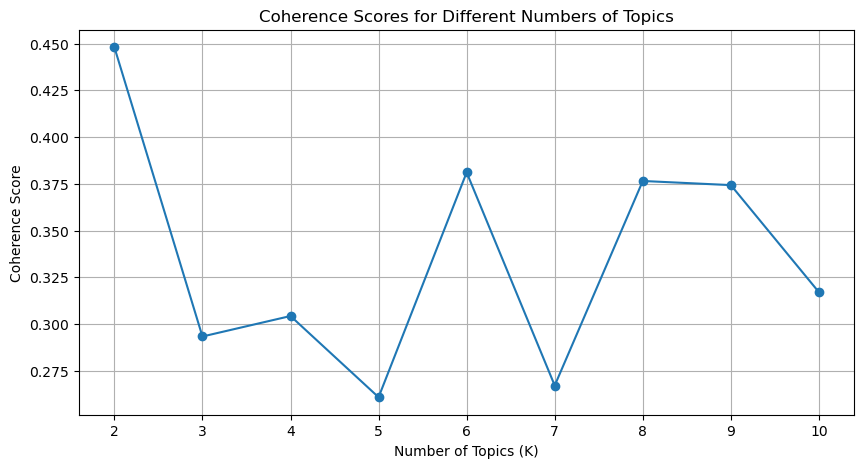

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, coherence_values, marker='o')
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Numbers of Topics")
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [23]:
num_topics = 3  # 예시로 2개의 주제를 추출하도록 설정
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# 결과 확인
topics = lda_model.print_topics(num_words=5) # 각 주제별로 연관성이 높은 단어 5개씩 출력
print("추출된 주제:")
for topic in topics:
    print(topic)

추출된 주제:
(0, '0.036*"정책" + 0.036*"부동산" + 0.021*"대한" + 0.021*"공급" + 0.021*"위"')
(1, '0.043*"위해" + 0.030*"마련" + 0.017*"입양" + 0.017*"사랑" + 0.017*"정부"')
(2, '0.029*"선수" + 0.029*"가족" + 0.029*"유기견" + 0.017*"시장" + 0.017*"대책"')


2. Coherence Score 계산 결과를 참고하여, 최적의 토픽 개수인 2 대신 3으로 설정(num_topics = 3)하여 LDA 모델을 다시 훈련시켜 보세요. 그리고 추출된 3개의 주제가 각각 무엇을 의미하는지 해석해보세요.

3. okt.nouns()를 사용하여 명사만 추출했던 기존 방식 대신, okt.morphs()를 사용하여 모든 형태소를 추출하는 방식으로 변경해보세요. 토큰화 방식 변경 후, 생성되는 사전(dictionary)과 최종 토픽 결과가 어떻게 달라지는지 비교해보세요.

In [24]:
tokenized_docs = [okt.morphs(i) for i in documents]

dictionary = Dictionary(tokenized_docs)

corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

coherence_values = []
k_range = range(2, 11)  # 2개부터 10개까지의 토픽 수를 테스트

for num_topics in k_range:
    # LDA 모델 훈련
    model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=num_topics,
                     passes=100)
    
    # Coherence 모델 생성 및 점수 계산
    # coherence='c_v'는 가장 널리 쓰이는 일관성 측정 방법 중 하나입니다.
    coherencemodel = CoherenceModel(model=model, texts=tokenized_docs, dictionary=dictionary)
    coherence_values.append(coherencemodel.get_coherence())
    print(f"토픽 수 = {num_topics}, Coherence Score = {coherencemodel.get_coherence():.4f}")

토픽 수 = 2, Coherence Score = 0.2882
토픽 수 = 3, Coherence Score = 0.2608
토픽 수 = 4, Coherence Score = 0.5427
토픽 수 = 5, Coherence Score = 0.5624
토픽 수 = 6, Coherence Score = 0.3739
토픽 수 = 7, Coherence Score = 0.3842
토픽 수 = 8, Coherence Score = 0.5986
토픽 수 = 9, Coherence Score = 0.5176
토픽 수 = 10, Coherence Score = 0.5174


In [25]:
num_topics = 8  # 예시로 2개의 주제를 추출하도록 설정
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# 결과 확인
topics = lda_model.print_topics(num_words=5) # 각 주제별로 연관성이 높은 단어 5개씩 출력
print("추출된 주제:")
for topic in topics:
    print(topic)

추출된 주제:
(0, '0.006*"." + 0.006*"을" + 0.006*"이" + 0.006*"있습니다" + 0.006*"에"')
(1, '0.060*"." + 0.053*"이" + 0.038*"을" + 0.023*"입양" + 0.023*"과"')
(2, '0.006*"이" + 0.006*"." + 0.006*"을" + 0.006*"사랑" + 0.006*"에"')
(3, '0.006*"." + 0.006*"집값" + 0.006*"집" + 0.006*"총량" + 0.006*"위해"')
(4, '0.054*"." + 0.029*"했습니다" + 0.029*"가" + 0.029*"있습니다" + 0.029*"선수"')
(5, '0.063*"." + 0.040*"들" + 0.040*"을" + 0.040*"의" + 0.024*"에"')
(6, '0.006*"." + 0.006*"을" + 0.006*"강력한" + 0.006*"대한" + 0.006*"규제"')
(7, '0.047*"을" + 0.047*"." + 0.032*"있습니다" + 0.032*"에" + 0.032*"이"')


4. 아래의 new_sentence를 모델이 학습했던 방식과 동일하게 전처리(토큰화, doc2bow)한 후, 훈련된 lda_model을 사용하여 이 문장이 어떤 토픽에 속할 확률이 가장 높은지 코드를 작성하여 확인해보세요.

In [29]:
new_sentence = "정부가 아파트 가격 안정을 위해 새로운 정책을 내놓았다."

A = okt.morphs(new_sentence)
B = dictionary.doc2bow(A)
lda_model.get_document_topics(B)

[(0, 0.012500146),
 (1, 0.012520695),
 (2, 0.012500146),
 (3, 0.012500146),
 (4, 0.012508206),
 (5, 0.9124584),
 (6, 0.012500146),
 (7, 0.012512065)]

5. 아래의 my_documents 리스트를 사용하여, 노트북의 전체 과정을 참고하여 처음부터 끝까지 토픽 모델링을 수행해보세요. (토픽 개수는 2로 설정)
    * 토큰화 (명사 추출)
    * 사전 및 코퍼스 생성
    * LDA 모델 훈련
    * 결과(토픽별 주요 단어) 출력 및 해석

In [32]:
my_documents = [
    "오늘 점심은 맛있는 파스타를 먹었다. 저녁에는 치킨을 먹어야겠다.",
    "주말에 친구와 함께 제주도로 여행을 갈 계획이다. 비행기 표를 예매했다.",
    "맛집 탐방은 나의 유일한 취미이다. 특히 이탈리안 음식을 좋아한다.",
    "여름 휴가로 해외 여행을 가고 싶다. 가보고 싶은 여행지가 많다."
]

tokenized_docs = [okt.nouns(i) for i in my_documents]
dictionary = Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(i )for i in tokenized_docs]

for num_topics in k_range:
    # LDA 모델 훈련
    model = LdaModel(corpus=corpus,
                     id2word=dictionary,
                     num_topics=num_topics,
                     passes=100)
    
    # Coherence 모델 생성 및 점수 계산
    # coherence='c_v'는 가장 널리 쓰이는 일관성 측정 방법 중 하나입니다.
    coherencemodel = CoherenceModel(model=model, texts=tokenized_docs, dictionary=dictionary)
    coherence_values.append(coherencemodel.get_coherence())
    print(f"토픽 수 = {num_topics}, Coherence Score = {coherencemodel.get_coherence():.4f}")

토픽 수 = 2, Coherence Score = 0.4084
토픽 수 = 3, Coherence Score = 0.4194
토픽 수 = 4, Coherence Score = 0.4157
토픽 수 = 5, Coherence Score = 0.4382
토픽 수 = 6, Coherence Score = 0.4386
토픽 수 = 7, Coherence Score = 0.4085
토픽 수 = 8, Coherence Score = 0.4344
토픽 수 = 9, Coherence Score = 0.4351
토픽 수 = 10, Coherence Score = 0.4391


In [35]:
model = LdaModel(corpus=corpus, id2word=dictionary,
                 num_topics=3, passes=100)

model.print_topics(num_words=5)

[(0, '0.105*"여행" + 0.105*"여름" + 0.105*"해외" + 0.105*"여행지" + 0.105*"휴가"'),
 (1, '0.071*"탐방" + 0.071*"맛집" + 0.071*"나" + 0.071*"이탈리안" + 0.071*"취미"'),
 (2, '0.085*"여행" + 0.085*"계획" + 0.085*"주말" + 0.085*"비행기" + 0.085*"제주도"')]

In [36]:
vis_data = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
pyLDAvis.display(vis_data)